In [1]:
import bnpy
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
import seaborn as sns

FIG_SIZE = (15, 8)
plt.rcParams['figure.figsize'] = FIG_SIZE

# dataset_path = os.path.join('..', 'data')
# all_data = bnpy.data.XData.read_csv(os.path.join(dataset_path, 'anomaly0245.csv'))

In [ ]:
%qtconsole

# Prepare Data

Create training data and new batch data for simple test.

In [10]:
data_start = 0
data_init_size = 20000
batch_size = 2000
batchnum = int(data_init_size/batch_size)
dataset_path = os.path.join('/home/torenvln/git/bnp-anomaly/', 'data')
all_data = bnpy.data.XData.read_csv(os.path.join(dataset_path, 'anomaly0245.csv'))
train_dataset = all_data.make_subset(example_id_list=list(range(data_start, data_start + data_init_size)))
batches = []
i = 0 
while i < len(all_data.X)- batch_size:
    batches.append(all_data.make_subset(example_id_list=list(range(i, i+ batch_size))))
    i += batch_size

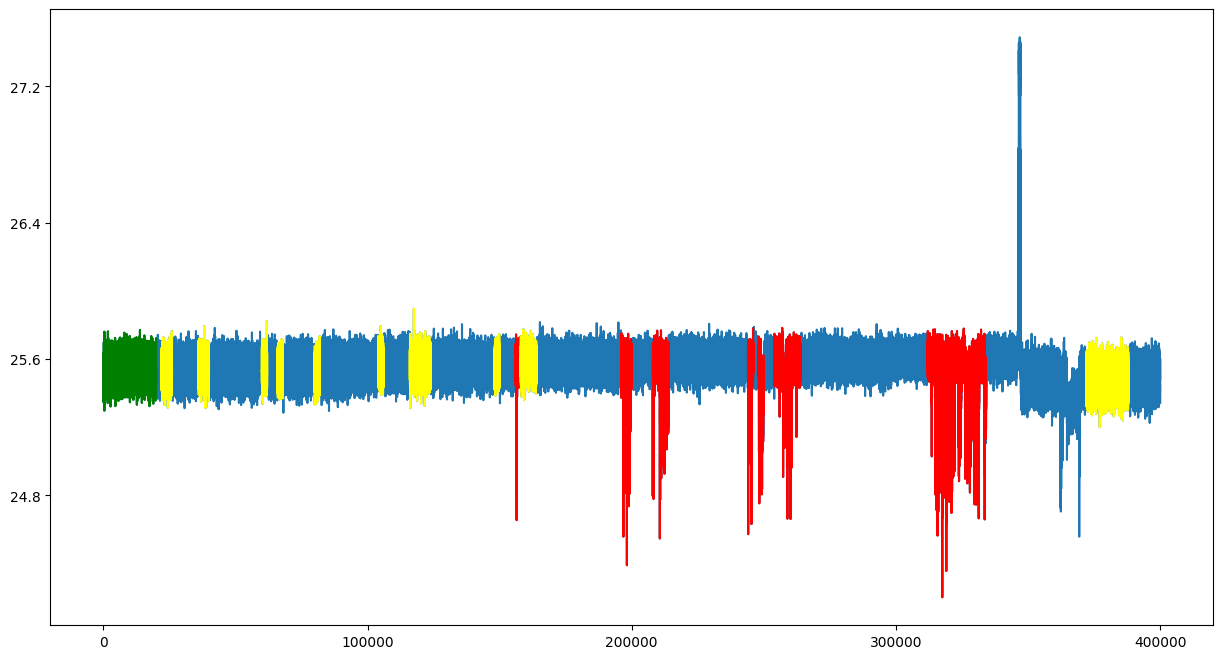

In [37]:
plt.plot(all_data.X[:, 0], all_data.X[:, 1])
plt.plot(train_dataset.X[:, 0], train_dataset.X[:, 1], c='green')

plt.plot(batches[78].X[:, 0], batches[78].X[:, 1], c='red')
plt.plot(batches[98].X[:, 0], batches[98].X[:, 1], c='red')
plt.plot(batches[99].X[:, 0], batches[99].X[:, 1], c='red')
plt.plot(batches[104].X[:, 0], batches[104].X[:, 1], c='red')
plt.plot(batches[105].X[:, 0], batches[105].X[:, 1], c='red')
plt.plot(batches[106].X[:, 0], batches[106].X[:, 1], c='red')
plt.plot(batches[122].X[:, 0], batches[122].X[:, 1], c='red')
plt.plot(batches[124].X[:, 0], batches[124].X[:, 1], c='red')
plt.plot(batches[127].X[:, 0], batches[127].X[:, 1], c='red')
plt.plot(batches[128].X[:, 0], batches[128].X[:, 1], c='red')
plt.plot(batches[129].X[:, 0], batches[129].X[:, 1], c='red')
plt.plot(batches[130].X[:, 0], batches[130].X[:, 1], c='red')
plt.plot(batches[131].X[:, 0], batches[131].X[:, 1], c='red')
plt.plot(batches[156].X[:, 0], batches[156].X[:, 1], c='red')
plt.plot(batches[157].X[:, 0], batches[157].X[:, 1], c='red')
plt.plot(batches[158].X[:, 0], batches[158].X[:, 1], c='red')
plt.plot(batches[159].X[:, 0], batches[159].X[:, 1], c='red')
plt.plot(batches[160].X[:, 0], batches[160].X[:, 1], c='red')
plt.plot(batches[161].X[:, 0], batches[161].X[:, 1], c='red')
plt.plot(batches[162].X[:, 0], batches[162].X[:, 1], c='red')
plt.plot(batches[163].X[:, 0], batches[163].X[:, 1], c='red')
plt.plot(batches[164].X[:, 0], batches[164].X[:, 1], c='red')
plt.plot(batches[165].X[:, 0], batches[165].X[:, 1], c='red')
plt.plot(batches[166].X[:, 0], batches[166].X[:, 1], c='red')

plt.plot(batches[11].X[:, 0], batches[11].X[:, 1], c='yellow')
plt.plot(batches[12].X[:, 0], batches[12].X[:, 1], c='yellow')
plt.plot(batches[18].X[:, 0], batches[18].X[:, 1], c='yellow')
plt.plot(batches[19].X[:, 0], batches[19].X[:, 1], c='yellow')
plt.plot(batches[30].X[:, 0], batches[30].X[:, 1], c='yellow')
plt.plot(batches[33].X[:, 0], batches[33].X[:, 1], c='yellow')
plt.plot(batches[40].X[:, 0], batches[40].X[:, 1], c='yellow')
plt.plot(batches[52].X[:, 0], batches[52].X[:, 1], c='yellow')
plt.plot(batches[58].X[:, 0], batches[58].X[:, 1], c='yellow')
plt.plot(batches[59].X[:, 0], batches[59].X[:, 1], c='yellow')
plt.plot(batches[60].X[:, 0], batches[60].X[:, 1], c='yellow')
plt.plot(batches[61].X[:, 0], batches[61].X[:, 1], c='yellow')
plt.plot(batches[74].X[:, 0], batches[74].X[:, 1], c='yellow')
plt.plot(batches[79].X[:, 0], batches[79].X[:, 1], c='yellow')
plt.plot(batches[80].X[:, 0], batches[80].X[:, 1], c='yellow')
plt.plot(batches[81].X[:, 0], batches[81].X[:, 1], c='yellow')
plt.plot(batches[186].X[:, 0], batches[186].X[:, 1], c='yellow')
plt.plot(batches[187].X[:, 0], batches[187].X[:, 1], c='yellow')
plt.plot(batches[188].X[:, 0], batches[188].X[:, 1], c='yellow')
plt.plot(batches[189].X[:, 0], batches[189].X[:, 1], c='yellow')
plt.plot(batches[190].X[:, 0], batches[190].X[:, 1], c='yellow')
plt.plot(batches[191].X[:, 0], batches[191].X[:, 1], c='yellow')
plt.plot(batches[192].X[:, 0], batches[192].X[:, 1], c='yellow')
plt.plot(batches[193].X[:, 0], batches[193].X[:, 1], c='yellow')
plt.show()

anomalies = [78, 98, 99, 104, 105, 106, 122, 124, 127, 128, 129, 130, 131, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166]
cleans = [11, 12, 18, 19, 30, 33, 40, 52, 58, 59, 60, 61, 74, 79, 80, 81, 186, 187, 188, 189, 190, 191, 192, 193]

# Train model

Lots of hyper-parameters that can be tuned and changed to improve model learning.

In [4]:
###############################################################################
#
# *DiagGauss* observation model
# --------------------------------------------
#

gamma = 1.0
sF = 1.0
K = 10  # Initialize K component

trained_model, info_dict = bnpy.run(
    train_dataset, 'DPMixtureModel', 'DiagGauss', 'memoVB',
    output_path=f'/tmp/faithful/trymoves-K={K}-gamma={gamma}-lik=DiagGauss-ECovMat={sF}*eye-moves=none/',
    nLap=1000, nTask=1, nBatch=batchnum, convergeThr=0.0001,
    gamma0=gamma, sF=sF, ECovMat='eye',
    moves='birth,merge,delete,shuffle',
    K=K, initname='randexamplesbydist', ts=True)

  --ts
Dataset Summary:
X Data
  total size: 400000 units
  batch size: 2000 units
  num. batches: 10
Allocation Model:  DP mixture with K=0. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 4 
  beta = [ 2  2] 
  Expectations
  E[  mean[k]] = 
  [ 0  0]
  E[ covar[k]] = 
  [[1. 0.]
   [0. 1.]]
Initialization:
  initname = randexamplesbydist
  K = 10 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/faithful/trymoves-K=10-gamma=1.0-lik=DiagGauss-ECovMat=1.0*eye-moves=none/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
DELETE @ lap 1.00: Disabled. Cannot delete before first complete lap, because SS that represents whole dataset is required.
    0.100/1000 after      0 sec. |    259.0 MiB | K 

# New Operations  

- Only done on replacing the batchSS.
- There are SS specific copy operations, find out and used them  
- [] Figure out calculation of propXSS which is needed for anomaly detection.

In [5]:
# Get the learned SS from model and info dict
S_k0 = copy.deepcopy(info_dict["SS"])  # This is the S_k0, sufficient statistics of the component of entire dataset
SSmemory = copy.deepcopy(info_dict["SSmemory"])  # Dictionary of SS for all batches

In [6]:
vars(trained_model.obsModel.Post)

{'K': 1,
 'D': 2,
 '_FieldDims': {'nu': 'K', 'kappa': 'K', 'm': ('K', 'D'), 'beta': ('K', 'D')},
 'doCollapseK1': False,
 'nu': array([20004.]),
 'kappa': array([20000.0001]),
 'm': array([[9999.49995   ,   25.54308909]]),
 'beta': array([[6.66666675e+11, 6.05398905e+01]])}

In [29]:
K = []
D = []
M = []
N = []
x = []
xx = []
beta = []
for key in SSmemory:
    K.append(SSmemory[key].K)
    D.append(SSmemory[key].D)
    M.append(SSmemory[key].M)
    N.append(SSmemory[key].N)
    x.append(SSmemory[key].x)
    xx.append(SSmemory[key].xx)  
x = np.vstack(x)
xx = np.vstack(xx)

LPanomaly = []
SSanomaly = []
for anomaly in anomalies:
    LP = trained_model.calc_local_params(batches[anomaly])
    LPanomaly.append(LP)  # Calculation of responsibility, needed for next step
    SSanomaly.append(trained_model.get_global_suff_stats(batches[anomaly], LP))  # Calculation of SS for new data

Kanomaly = []
Danomaly = []
Manomaly = []
Nanomaly = []
xanomaly = []
xxanomaly = []
betaanomaly = []
for key in SSbatch:
    Kanomaly.append(key.K)
    Danomaly.append(key.D)
    Manomaly.append(key.M)
    Nanomaly.append(key.N)
    xanomaly.append(key.x)
    xxanomaly.append(key.xx)
xanomaly = np.vstack(xanomaly)
xxanomaly = np.vstack(xxanomaly)

In [35]:
LPclean = []
SSclean = []
for clean in cleans:
    LP = trained_model.calc_local_params(batches[clean])
    LPclean.append(LP)  # Calculation of responsibility, needed for next step
    SSclean.append(trained_model.get_global_suff_stats(batches[clean], LP))  # Calculation of SS for new data

Kclean = []
Dclean = []
Mclean = []
Nclean = []
xclean = []
xxclean = []
betaclean = []
for key in SSclean:
    Kclean.append(key.K)
    Dclean.append(key.D)
    Mclean.append(key.M)
    Nclean.append(key.N)
    xclean.append(key.x)
    xxclean.append(key.xx)  
xclean = np.vstack(xclean)
xxclean = np.vstack(xxclean)

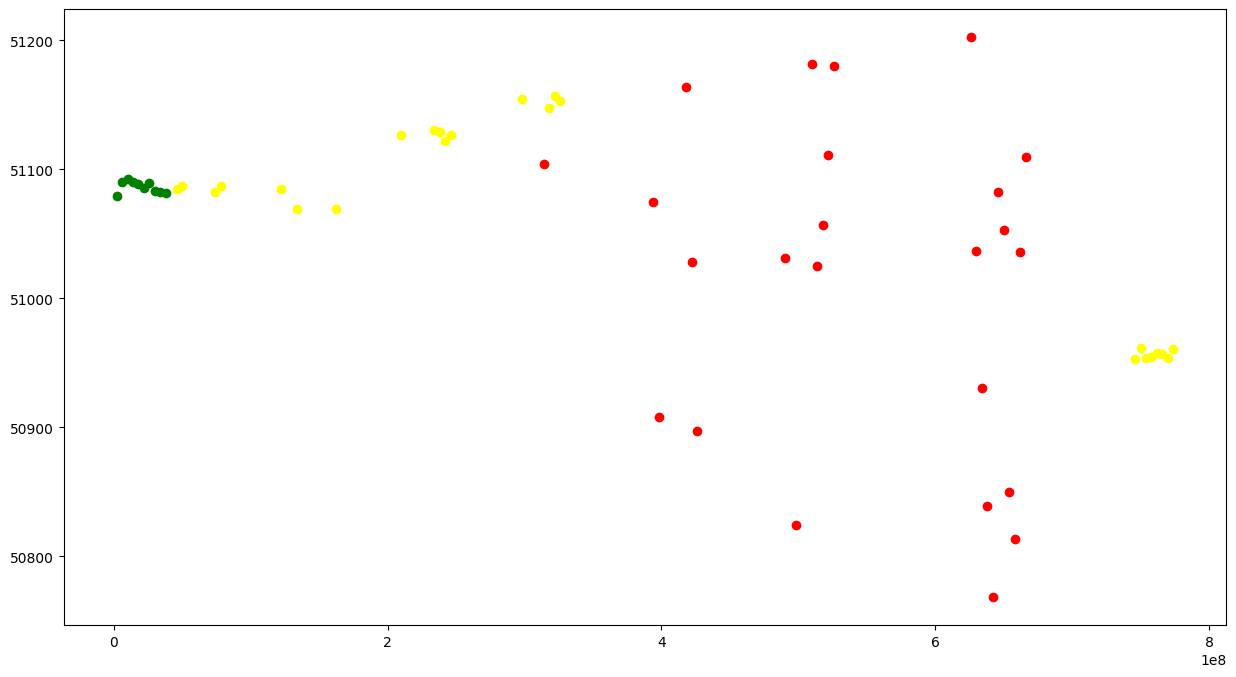

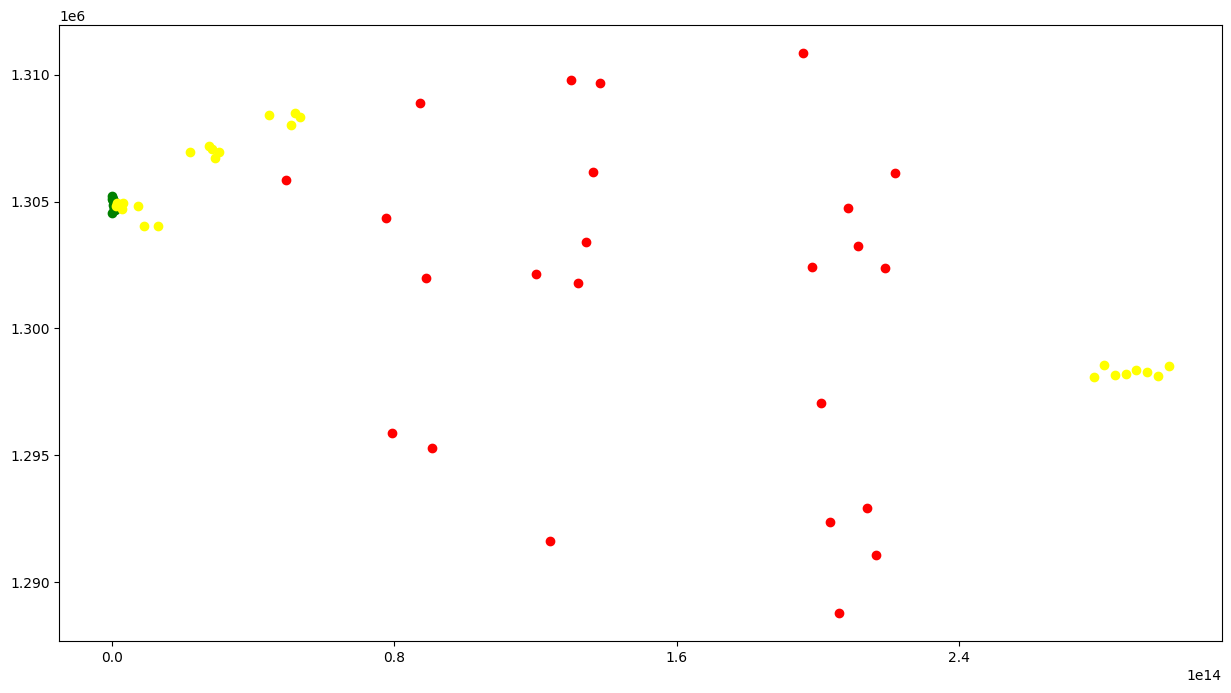

In [36]:
plt.scatter(x[:,0], x[:,1], c='green')
plt.scatter(xbatch[:,0], xbatch[:,1], c='red')
plt.scatter(xclean[:,0], xclean[:,1], c='yellow')
plt.show()

plt.scatter(xx[:,0], xx[:,1], c='green')
plt.scatter(xxbatch[:,0], xxbatch[:,1], c='red')
plt.scatter(xxclean[:,0], xxclean[:,1], c='yellow')
plt.show()